<a href="https://colab.research.google.com/github/ymgong666/Machine-Learning-in-Action-Python3/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(2016,)


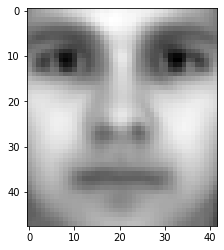

In [10]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import time
yale = sio.loadmat('/content/drive/My Drive/yalefaces.mat')
yalefaces = yale['yalefaces']
# fig, ax = plt.subplots()
# for i in range(0,yalefaces.shape[2]):
    # x = yalefaces[:,:,i]
    # ax.imshow(x, extent=[0, 1, 0, 1])
    # plt.imshow(x, cmap=plt.get_cmap('gray'))
    # time.sleep(0.1)
    # plt.show()
yalefacesvec = np.zeros((yalefaces.shape[0]*yalefaces.shape[1],yalefaces.shape[2]))
for i in range(0,yalefaces.shape[2]): 
  yalefacesvec[:,i] = np.squeeze(np.reshape(yalefaces[:,:,i],(yalefaces.shape[0]*yalefaces.shape[1],1)), axis = 1)
yaleav = np.mean(yalefacesvec,axis = 1)
for i in range(0,yalefacesvec.shape[1]):
  yalefacesvec[:,i] = yalefacesvec[:,i] - yaleav
S = yalefacesvec@np.eye(yalefacesvec.shape[1], dtype=int)@yalefacesvec.T/yalefacesvec.shape[1]

43 components represent 95% of the total variation
97.8670634920635 % of dimension is reduced
167 components represent 99% of the total variation
91.71626984126983 % of dimension is reduced


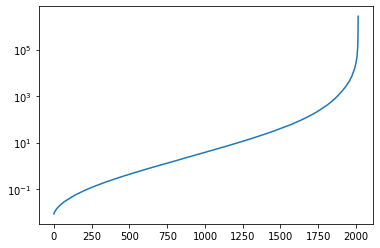

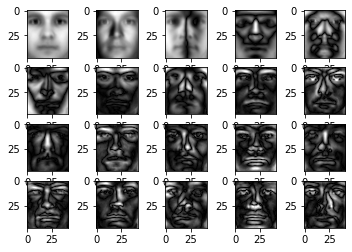

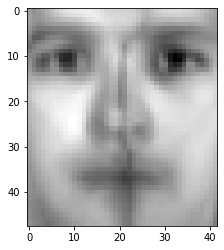

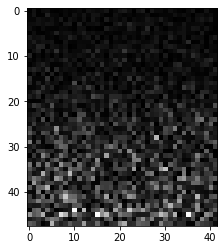

In [31]:
from numpy import linalg as LA
w, v = LA.eig(S)

j = 0
vsort = np.zeros((v.shape[0],v.shape[1]))
for i in np.argsort(w):
  vsort[:,j] = v[:,i]
  j += 1
w = np.sort(w)
fig2 = plt.figure()
plt.semilogy(w)
sumw = np.sum(w)
i = 0
wpca = 0
while i<len(w):
  wpca = wpca + w[-i]
  if wpca > sumw*0.95:
    break
  i += 1
print(i,'components represent 95% of the total variation')
print(100*(1-i/len(w)),'% of dimension is reduced')
i = 0
wpca = 0
while i<len(w):
  wpca = wpca + w[-i]
  if wpca > sumw*0.99:
    break
  i += 1
print(i,'components represent 99% of the total variation')
print(100*(1-i/len(w)),'% of dimension is reduced')
fig, axs = plt.subplots(4, 5)
i = 0
for ax in fig.get_axes():
  if i == 0:
    ax.imshow(np.reshape(yaleav,(yalefaces.shape[0],yalefaces.shape[1])), cmap=plt.get_cmap('gray'))
  else:
    ax.imshow( np.reshape(np.abs(vsort[:,-i]),(yalefaces.shape[0],yalefaces.shape[1])), cmap=plt.get_cmap('gray'))
  i += 1


In [1]:

afrom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import time
yale = sio.loadmat('/content/drive/My Drive/yalefaces.mat')
yalefaces = yale['yalefaces']
# fig, ax = plt.subplots()
# for i in range(0,yalefaces.shape[2]):
    # x = yalefaces[:,:,i]
    # ax.imshow(x, extent=[0, 1, 0, 1])
    # plt.imshow(x, cmap=plt.get_cmap('gray'))
    # time.sleep(0.1)
    # plt.show()
print(np.shape(yalefaces))
yalefacesvec = np.zeros((yalefaces.shape[0]*yalefaces.shape[1],yalefaces.shape[2]))
for i in range(0,yalefaces.shape[2]): 
  yalefacesvec[:,i] = np.squeeze(np.reshape(yalefaces[:,:,i],(yalefaces.shape[0]*yalefaces.shape[1],1)), axis = 1)
yaleav = np.sum(yalefacesvec,axis = 1)/yalefacesvec.shape[1]
yaleavimage = np.reshape(yaleav,(yalefaces.shape[0],yalefaces.shape[1]))
plt.imshow(yaleavimage, cmap=plt.get_cmap('gray'))
for i in range(0,yalefacesvec.shape[1]):
  yalefacesvec[:,i] = yalefacesvec[:,i] - yaleav
# S = np.zeros((yalefacesvec.shape[0],yalefacesvec.shape[0]))
S = yalefacesvec@np.eye(yalefacesvec.shape[1], dtype=int)@yalefacesvec.T

print(yalefacesvec.shape)

In [ ]:
from numpy import linalg as LA
w, v = LA.eig(S)

j = 0
vsort = np.zeros((v.shape[0],v.shape[1]))
for i in np.argsort(w):
  vsort[:,j] = v[:,i]
  j += 1
w = np.sort(w)
fig2 = plt.figure()
plt.semilogy(w)
sumw = np.sum(w)
i = 0
wpca = 0
while i<len(w):
  wpca = wpca + w[-i]
  if wpca > sumw*0.95:
    break
  i += 1
print(i,'components represent 95% of the total variation')
print(100*(1-i/len(w)),'% of dimension is reduced')
i = 0
wpca = 0
while i<len(w):
  wpca = wpca + w[-i]
  if wpca > sumw*0.99:
    break
  i += 1
print(i,'components represent 99% of the total variation')
print(100*(1-i/len(w)),'% of dimension is reduced')
fig, axs = plt.subplots(4, 5)
i = 0
for ax in fig.get_axes():
  if i == 0:
    ax.imshow(np.reshape(yaleav,(yalefaces.shape[0],yalefaces.shape[1])), cmap=plt.get_cmap('gray'))
  else:
    ax.imshow( np.reshape(np.abs(vsort[:,-i]),(yalefaces.shape[0],yalefaces.shape[1])), cmap=plt.get_cmap('gray'))
  i += 1
vec = yaleav*0
w = w/sumw
for i in range(1,2015):
  vec = vec + np.abs(w[-i]*vsort[:,-i])
fig = plt.figure()
plt.imshow(np.reshape(np.abs(vec/2016),(yalefaces.shape[0],yalefaces.shape[1])), cmap=plt.get_cmap('gray'))
fig3 = plt.figure()
plt.imshow(np.reshape(np.abs(vsort[2015]),(yalefaces.shape[0],yalefaces.shape[1])), cmap=plt.get_cmap('gray'))


In [39]:
a = np.asarray([2,3,4,5,6,7])
b = a.reshape(2,3)
b = b.reshape(1,6)
print(b)

[[2 3 4 5 6 7]]


In [18]:
a = [1,3,2,4,5]
b = [3,4,3,4,5]
for i in np.argsort(a):
  print(i)
print(a)

0
2
1
3
4
[1, 3, 2, 4, 5]
